# Aplicando Python para análisis de precios: descarga, manejo y análisis de datos

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="300px" height="100px" />

> Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones. Para lograr este objetivo, primero veremos como manipular datos con *pandas*, tanto desde un archivo local de excel como remotamente desde Yahoo Finance.

> Python Data Analysis Library: pandas es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- http://www.learndatasci.com/python-finance-part-yahoo-finance-api-pandas-matplotlib/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial

## 0. Motivación

<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/d/d7/Philippine-stock-market-board.jpg" width="400px" height="125px" />

Hace una década, los instrumentos financieros estaban en la cúspide de la popularidad. Las instituciones financieras de todo el mundo estaban negociando miles de millones de dólares de estos instrumentos a diario, y los analistas cuantitativos estaban modelándolos utilizando el cálculo estocástico y el poderoso `C++`.

Sin embargo, el avance en los últimos años ha sido impresionante y las cosas han cambiado. Por una parte, la [crisis financiera del 2008](https://es.wikipedia.org/wiki/Crisis_financiera_de_2008) fue producida por los instrumentos financieros llamados *derivados*. Por otra parte, los volúmenes transaccionales han bajado y la demanda de modelado con `C++` se ha marchitado con ellos. Además, un nuevo jugador entró en la competencia... `¡Python!`

`Python` ha estado ganando muchos seguidores en la industria financiera en los últimos años y con razón. No en vano, junto a `R` son los lenguajes de programación más utilizados en cuanto a análisis financiero.

## 1. Descarga de datos de Yahoo! Finance
Para esto utilizaremos el paquete *pandas_datareader*.

**Nota**: Usualmente, las distribuciones de Python no cuentan, por defecto, con el paquete *pandas_datareader*. Por lo que será necesario instalarlo aparte:
- buscar en inicio "Anaconda prompt" y ejecutarlo como administrador;
- el siguiente comando instala el paquete en Anaconda: *conda install pandas-datareader*;
- una vez finalice la instalación correr el comando: *conda list*, y buscar que sí se haya instalado pandas-datareader

In [4]:
import pandas_datareader.data as web

Primero importaremos datos desde un archivo con extensión `.csv`

In [9]:
import pandas as pd

data = pd.read_csv("Excels\FB.csv")
print(data)

print(data.mean())
print(data.std())
print(data.describe())

            Date        Open        High         Low       Close   Adj Close  \
0     2015-01-02   78.580002   78.930000   77.699997   78.449997   78.449997   
1     2015-01-05   77.980003   79.250000   76.860001   77.190002   77.190002   
2     2015-01-06   77.230003   77.589996   75.360001   76.150002   76.150002   
3     2015-01-07   76.760002   77.360001   75.820000   76.150002   76.150002   
4     2015-01-08   76.739998   78.230003   76.080002   78.180000   78.180000   
...          ...         ...         ...         ...         ...         ...   
1001  2018-12-24  123.099998  129.740005  123.019997  124.059998  124.059998   
1002  2018-12-26  126.000000  134.240005  125.889999  134.179993  134.179993   
1003  2018-12-27  132.440002  134.990005  129.669998  134.520004  134.520004   
1004  2018-12-28  135.339996  135.919998  132.199997  133.199997  133.199997   
1005  2018-12-31  134.449997  134.639999  129.949997  131.089996  131.089996   

        Volume  
0     18177500  
1    

C:\Users\eddie\AppData\Local\Temp\ipykernel_9872\1956438962.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.mean())
C:\Users\eddie\AppData\Local\Temp\ipykernel_9872\1956438962.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(data.std())


Ahora lo haremos desde Yahoo Finance

In [11]:
web.DataReader?

In [20]:
data = web.DataReader("AAPL", "yahoo", "2003-11-22", "2004-10-10")
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2003-11-24,0.379821,0.365179,0.366071,0.377679,381824800,0.322474
2003-11-25,0.379464,0.368036,0.379107,0.369286,268654400,0.315308
2003-11-26,0.377679,0.361607,0.373036,0.370000,245128800,0.315918
2003-11-28,0.376250,0.366429,0.371071,0.373393,76098400,0.318815
2003-12-01,0.390179,0.375000,0.375714,0.387679,361536000,0.331013
...,...,...,...,...,...,...
2004-10-04,0.699643,0.691964,0.699643,0.692679,574084000,0.591431
2004-10-05,0.708393,0.685714,0.688571,0.703036,406162400,0.600275
2004-10-06,0.727857,0.704821,0.705357,0.725714,446303200,0.619638


#### La api de yahoo es inestable. Puede ser que nos toque intentar varias veces antes de tener éxito

In [21]:
data["Open"]

Date
2003-11-24    0.366071
2003-11-25    0.379107
2003-11-26    0.373036
2003-11-28    0.371071
2003-12-01    0.375714
                ...   
2004-10-04    0.699643
2004-10-05    0.688571
2004-10-06    0.705357
2004-10-07    0.723929
2004-10-08    0.706429
Name: Open, Length: 220, dtype: float64

In [22]:
data.describe()

,High,Low,Open,Close,Volume,Adj Close
count,220.000000,220.000000,220.000000,220.000000,2.200000e+02,220.000000
mean,0.508011,0.492483,0.498999,0.500798,3.701000e+08,0.427597
std,0.093581,0.091125,0.091866,0.092758,2.185498e+08,0.079200
min,0.355179,0.343750,0.350893,0.351786,7.609840e+07,0.300366
25%,0.421473,0.407143,0.412098,0.411830,2.488388e+08,0.351634
50%,0.499732,0.483928,0.491071,0.491339,3.235876e+08,0.419521
75%,0.573928,0.556295,0.561875,0.565982,4.124792e+08,0.483254
max,0.730893,0.704821,0.723929,0.725714,1.767724e+09,0.619638


In [26]:
def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]

data = getClose("MSFT", "2012-01-01", "2013-01-01")
data

Date
2012-01-03    21.527197
2012-01-04    22.033810
2012-01-05    22.258970
2012-01-06    22.604759
2012-01-09    22.307220
                ...    
2012-12-24    22.375805
2012-12-26    22.210428
2012-12-27    22.293116
2012-12-28    21.954086
2012-12-31    22.086390
Name: Adj Close, Length: 250, dtype: float64

Symbols        MSFT        NFLX        TSLA
count    505.000000  505.000000  505.000000
mean     157.831829  387.966593   57.528172
std       37.001222   78.931238   55.979811
min       93.573837  254.589996   11.931333
25%      131.003983  329.089996   17.361334
50%      150.186401  364.369995   28.509333
75%      197.933960  469.959991   80.577332
max      227.637238  556.549988  235.223328


<AxesSubplot:xlabel='Date'>

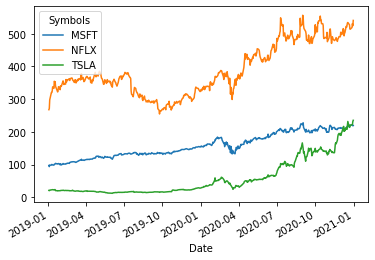

In [29]:


names = ["MSFT", "NFLX", "TSLA"]
data = getClose(names, "2019-01-01", "2021-01-01")
data

print(data.describe())

%matplotlib inline
data.plot()

¿Cómo lucen estos datos?

<AxesSubplot:ylabel='Frequency'>

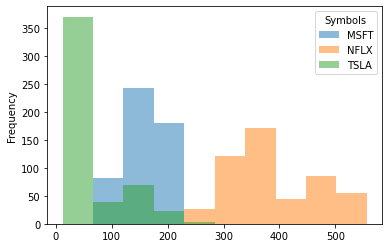

In [33]:
data.plot.hist(alpha=0.5)

Una vez tenemos los datos, podemos operar con ellos. Por ejemplo un resumen de datos estadísticos se podría obtener con

## 2. Rendimientos diarios

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, ¿cómo calcular esto?

In [47]:
data.shift().head()

Symbols,MSFT,NFLX,TSLA
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,97.147713,267.660004,20.674667
2019-01-04,93.573837,271.200012,20.024000
2019-01-07,97.925888,297.570007,21.179333
2019-01-08,98.050774,315.339996,22.330667


In [50]:
R = (data - data.shift())/data.shift()
print(R)
R.describe()

Symbols         MSFT      NFLX      TSLA
Date                                    
2019-01-02       NaN       NaN       NaN
2019-01-03 -0.036788  0.013226 -0.031472
2019-01-04  0.046509  0.097234  0.057697
2019-01-07  0.001275  0.059717  0.054361
2019-01-08  0.007251  0.015634  0.001164
...              ...       ...       ...
2020-12-24  0.007827 -0.000991  0.024443
2020-12-28  0.009921  0.010020  0.002901
2020-12-29 -0.003601  0.022634  0.003466
2020-12-30 -0.011019 -0.011830  0.043229
2020-12-31  0.003338  0.030767  0.015674

[505 rows x 3 columns]


Symbols,MSFT,NFLX,TSLA
count,504.000000,504.000000,504.000000
mean,0.001846,0.001727,0.005874
std,0.021463,0.025736,0.045553
min,-0.147390,-0.111389,-0.210628
25%,-0.007217,-0.012066,-0.014371
50%,0.001917,0.000876,0.003776
75%,0.011009,0.015766,0.025623
max,0.142169,0.116087,0.198949


<AxesSubplot:xlabel='Date'>

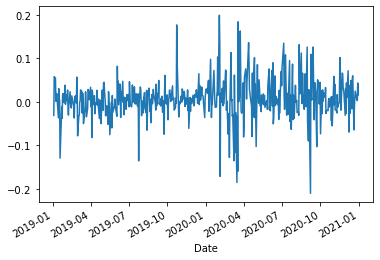

In [52]:
R["TSLA"].plot()

y la gráfica de los rendimientos se puede obtener como...

array([[<AxesSubplot:title={'center':'MSFT'}>,
        <AxesSubplot:title={'center':'NFLX'}>],
       [<AxesSubplot:title={'center':'TSLA'}>, <AxesSubplot:>]],
      dtype=object)

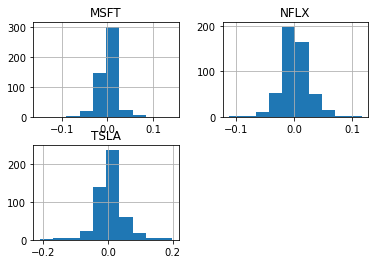

In [54]:
R.hist()

In [55]:
import numpy as np
r = np.log(data/data.shift())
r.head()

Symbols,MSFT,NFLX,TSLA
Date,,,
2019-01-02,NaN,NaN,NaN
2019-01-03,-0.037482,0.013139,-0.031978
2019-01-04,0.045460,0.092793,0.056094
2019-01-07,0.001274,0.058002,0.052935
2019-01-08,0.007224,0.015513,0.001164


Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

**Esta ecuación sólo es válida cuando se tienen periodos cortos de tiempo**
Es fácil darse cuenta que $r_t=\ln(1+R_t)$.


Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python (obtener, graficar y comparar).

Donde se observa que el rendimiento tiene una tendencia constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Podemos incluso plantear la hipótesis de que los log rendimientos son normales...

___
Recapitulando, hoy aprendimos a obtener datos con pandas-datareader directamente desde un archivo local ó fuentes remotas.

Por otra parte, estudiamos los rendimientos diarios y dimos con la conclusión de que se podrían modelar como un proceso estocástico estacionario normal.

La siguiente clase veremos como simular escenarios de comportamiento de los precios futuros (no determinístico, no sabemos como se comporta, muchas posibilidades: montecarlo) a partir de datos de ingresos diarios.

Luego, con esas predicciones veremos la probabilidad de que el precio de las acciones quede por encima (debajo) de cierto umbral y con ello tomar decisiones de vender (comprar) estas acciones.